Exercise 1 Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def onemax(x):
    return x.sum()

class BitFlipMutation:
    
    def mutate(self, x):
        idx=np.random.randint(x.shape[0])
        xp=x.copy()
        xp[idx]=abs(1-x[idx])
        return xp

def evolve(x, y, func, mutation, compare, A):
    xp=mutation.mutate(x)
    yp=func(xp)
    
    if not compare(y, yp):
        x=xp
        y=yp

    A.append(y)
    return x, y, A

def optimise(D, func, mutation, ngens, compare):
    x=np.random.randint(0,2,D)
    y=func(x)
    
    archive=[]
    
    for gen in range(ngens):
        x, y, archive=evolve(x, y, func, mutation,compare,archive)
        
    return x, y, archive

def greaterThanOrEqual(u,v):
    return u>=v

[1 1 1 1 1 1 1 1 1 1] 10


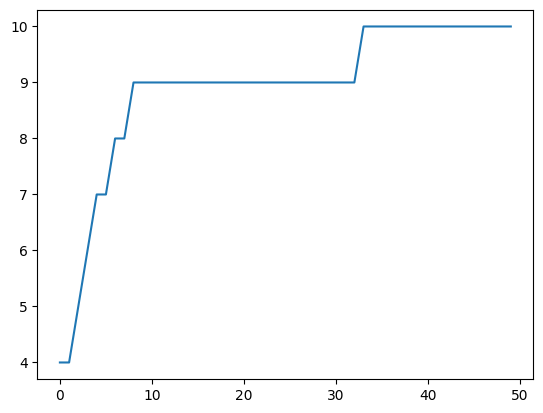

In [2]:
x, y, ylist=optimise(10, onemax, BitFlipMutation(), 50, greaterThanOrEqual)
print(x,y)
plt.plot(ylist)
plt.show()

Exercise 2 Solution

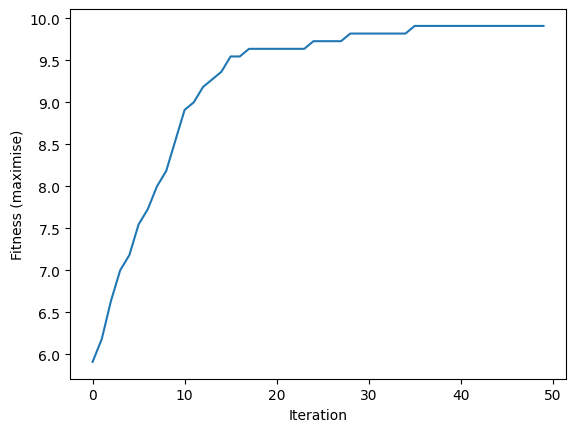

In [4]:
Ys=[]
for repeat in range(11):
    x, y, ylist=optimise(10, onemax, BitFlipMutation(), 50, greaterThanOrEqual)
    Ys.append(ylist)

Ys=np.array(Ys)

plt.figure
plt.plot(Ys.mean(axis=0))
plt.xlabel("Iteration")
plt.ylabel("Fitness (maximise)")
plt.savefig("onemax_repeat.png", bbox_inches="tight")

Exercise 3 Solution

In [5]:
class BlockFlipMutation:
    
    def mutate(self,x):
        idx, jdx=sorted(np.random.randint(0, x.shape[0],2))
        xp=x.copy()
        xp[idx:jdx]=abs(1-x[idx:jdx])
        return xp

class RandomMutation:
    
    def mutate(self,x):
        return np.random.randint(0,2,x.shape[0])

In [25]:
def experiment(func, title):
    mutstrs=["Bitflip", "Blockflip", "Random"]
    muts=[BitFlipMutation(), BlockFlipMutation(), RandomMutation()]
    
    plt.figure()
    
    for muts, mutstrs in zip(muts,mutstrs):
        Ys=[]
        for repeat in range(11):
            x, y, ylist=optimise(50, func, muts, 200, greaterThanOrEqual)
            Ys.append(ylist)
        Ys=np.array(Ys)
        
        plt.plot(Ys.mean(axis=0), label=mutstrs)
        
    plt.title(title)
    plt.xlabel("Iteration")
    plt.ylabel("Fitness (maximise)")
    plt.legend(loc=4)

In [21]:
L1=["Bitflip", "Blockflip", "Random"]
L2=[BitFlipMutation(), BlockFlipMutation(), RandomMutation()]

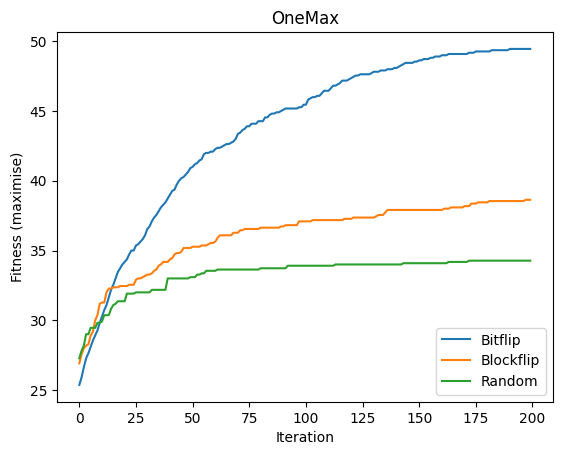

In [27]:
experiment(onemax, "OneMax")

Exercise 4 Solution

In [9]:
def leadingOnes(x):
    count=0
    for i in range (x.shape[0]):
        if x[i]==0:
            return count
        count+=1
        
    return count

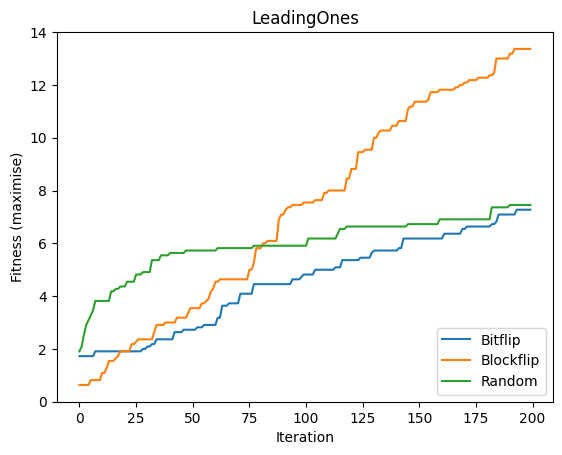

In [29]:
experiment(leadingOnes, "LeadingOnes")